# Exercises

Do your work for this exercise in a jupyter notebook or python script named tidy_data. Save this work in your classification-exercises repo. Add, commit, and push your changes.

In [42]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

from env import host, username, password, get_db_url
from pydataset import data
def describe_data(df):
    print('The first three rows are: ')
    print('----------------------------------------------------------')
    print(df.head(3))
    print('----------------------------------------------------------')
    print("The data frame's shape is: ")
    print('-------------------------')
    print(df.shape)
    print('-------------------------')   
    print('The data types and column names are: ')
    print(sorted(df))
    print(df.info())
    print('----------------------------------------------------------')   
    print('The summary statistics are as follows: ')
    print('----------------------------------------------------------')
    print(df.describe())
    print('----------------------------------------------------------')      
    print(f'The number of NA\'s is:')
    print('-------------------------')
    print(df.isna().sum())
    print('-------------------------')
    print('----------------------------------------------------------')  
    print('Unique Values for the Columns:')
    print('-------------------------')
    limit = 10
    for col in df.columns:
        if df[col].nunique() < limit:
            print(f'Column: {col}')
            print(f'Unique Values: {df[col].unique()}')
        else: 
            print(f'Column: {col}')
            print(f'Range of Values: [{df[col].min()} - {df[col].max()}]')
        print('-----------------------')
    print('--------------------')
       

## 1.) Attendance Data

Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:      

name     

Billy    0.5250      
Jane     0.6875      
John     0.9125      
Sally    0.7625      
Name: grade, dtype: float64      


In [47]:
attendance = pd.read_csv('untidy-data/attendance.csv')
# describe_data(attendance)
# there will never be a case of ten tardies in this table, so I can ignore that caveat. 
# on the same token, I can think of the tardy as being .9, since ten missed days, by this measure, would show 
# ten days of missing .1 on attendance would total a full day of absence, cumulatively. 

In [44]:
attendance_melt = attendance.melt(id_vars='Unnamed: 0',var_name = 'day', value_name='grade')
attendance_melt
# unnamed: 0 is a pretty terrible name. 
attendance_melt.columns = ['student', 'day', 'grade']
attendance_melt.head()

,student,day,grade
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [45]:
# Codeup standards. Unfortunately none of the students share a name with anyone here. 
def grade_conversion(x):
    if x == 'P':
        return 1
    elif x == 'H':
        return 0.5
    elif x == 'T':
        return 0.9
    else:
        return 0
    
# apply it. 
attendance_melt['grade_value'] = attendance_melt['grade'].apply(grade_conversion)
attendance_melt.head()

# see if mean would mimic the results of the table I am trying to capture. 
print(f'{attendance_melt.groupby("student").grade_value.mean()}')

print('Õ . õ')
print('And bingo was his name-o')

student
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade_value, dtype: float64
Õ . õ
And bingo was his name-o


In [48]:
# describe_data(attendance_melt)

## 2.) Coffee Levels

Read the coffee_levels table.        
Transform the data so that each carafe is in it's own column.       
Is this the best shape for the data?      

In [55]:
coffee = pd.read_csv('untidy-data/coffee_levels.csv')
describe_data(coffee)

The first three rows are: 
----------------------------------------------------------
   hour coffee_carafe  coffee_amount
0     8             x       0.816164
1     9             x       0.451018
2    10             x       0.843279
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(30, 3)
-------------------------
The data types and column names are: 
['coffee_amount', 'coffee_carafe', 'hour']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           30 non-null     int64  
 1   coffee_carafe  30 non-null     object 
 2   coffee_amount  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes
None
----------------------------------------------------------
The summary statistics are as follows: 
---------------------------------------------

In [56]:
# This definitely needs a pivot. 
coffee = coffee.pivot_table(index = ['hour'],
                    columns = 'coffee_carafe',
                    values = 'coffee_amount')
coffee
# Is this the best shape? Hmm. I'm not sure what it is even conveying, as far as hour goes. is it in military time? 
# a carafe is used to serve coffee, wine, and other beverages, it looks like a lipped vase. 


coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


## 3.) Cake Recipes
Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.      
Tidy the data as necessary.

In [57]:
cake_boss = pd.read_csv('untidy-data/cake_recipes.csv')
describe_data(cake_boss)

The first three rows are: 
----------------------------------------------------------
  recipe:position        225        250        275        300
0        a:bottom  61.738655  53.912627  74.414730  98.786784
1           a:top  51.709751  52.009735  68.576858  50.228470
2        b:bottom  57.095320  61.904369  61.196980  99.248541
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(8, 5)
-------------------------
The data types and column names are: 
['225', '250', '275', '300', 'recipe:position']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe:position  8 non-null      object 
 1   225              8 non-null      float64
 2   250              8 non-null      float64
 3   275              8 non-null      float64
 4   300              8 non-null      float64
dtypes: floa

In [72]:
cake_big_cheese = cake_boss['recipe:position'].str.split(":", expand = True)
cake_big_cheese.head() # currently named 0 and 1, let's fix that. 
cake_big_cheese.columns=['recipe','position']
cake_big_cheese = pd.concat([cake_boss, cake_big_cheese], axis=1)
cake_big_cheese.head()
# get rid of the column I split 
cake_big_cheese = cake_big_cheese.drop(columns=['recipe:position'])
cake_big_cheese.head()
cake_melt = cake_big_cheese.melt(id_vars=['recipe','position'], var_name = 'temperature', value_name = 'score').sort_values('recipe')
cake_melt = cake_melt.reset_index(drop=True)
cake_melt
# this is looking good. Let's answer the questions. 

,recipe,position,temperature,score
0,a,bottom,225,61.738655
1,a,top,275,68.576858
2,a,bottom,275,74.414730
3,a,top,300,50.228470
4,a,top,250,52.009735
5,a,bottom,250,53.912627
6,a,bottom,300,98.786784
7,a,top,225,51.709751
8,b,bottom,300,99.248541
9,b,top,275,98.594881


Which recipe, on average, is the best? recipe b

In [83]:
best_recipe = cake_melt.groupby('recipe').mean()
print("This recipe is the bees knees:")
print(f'{best_recipe.sort_values("score", ascending = False).head(1)}')
print("It is also the bee itself without the ee, dolphins pay respects")
# this looks ugly so I am not doing it again. 

This recipe is the bees knees:
            score
recipe           
b       76.736074
It is also the bee itself without the ee, dolphins pay respects


Which oven temperature, on average, produces the best results? 275

In [84]:
hot_in_here = cake_melt.groupby('temperature').mean()
print("It's getting hot in here. But please, leave on all your clothes. Socks, too.")
hot_in_here.sort_values('score', ascending = False).head(1)

It's getting hot in here. But please, leave on all your clothes. Socks, too.


,score
temperature,
275,74.886754


Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [85]:
cake_melt.sort_values('score', ascending = False).head(1)

,recipe,position,temperature,score
8,b,bottom,300,99.248541


## 4.) Bonus: 
explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.

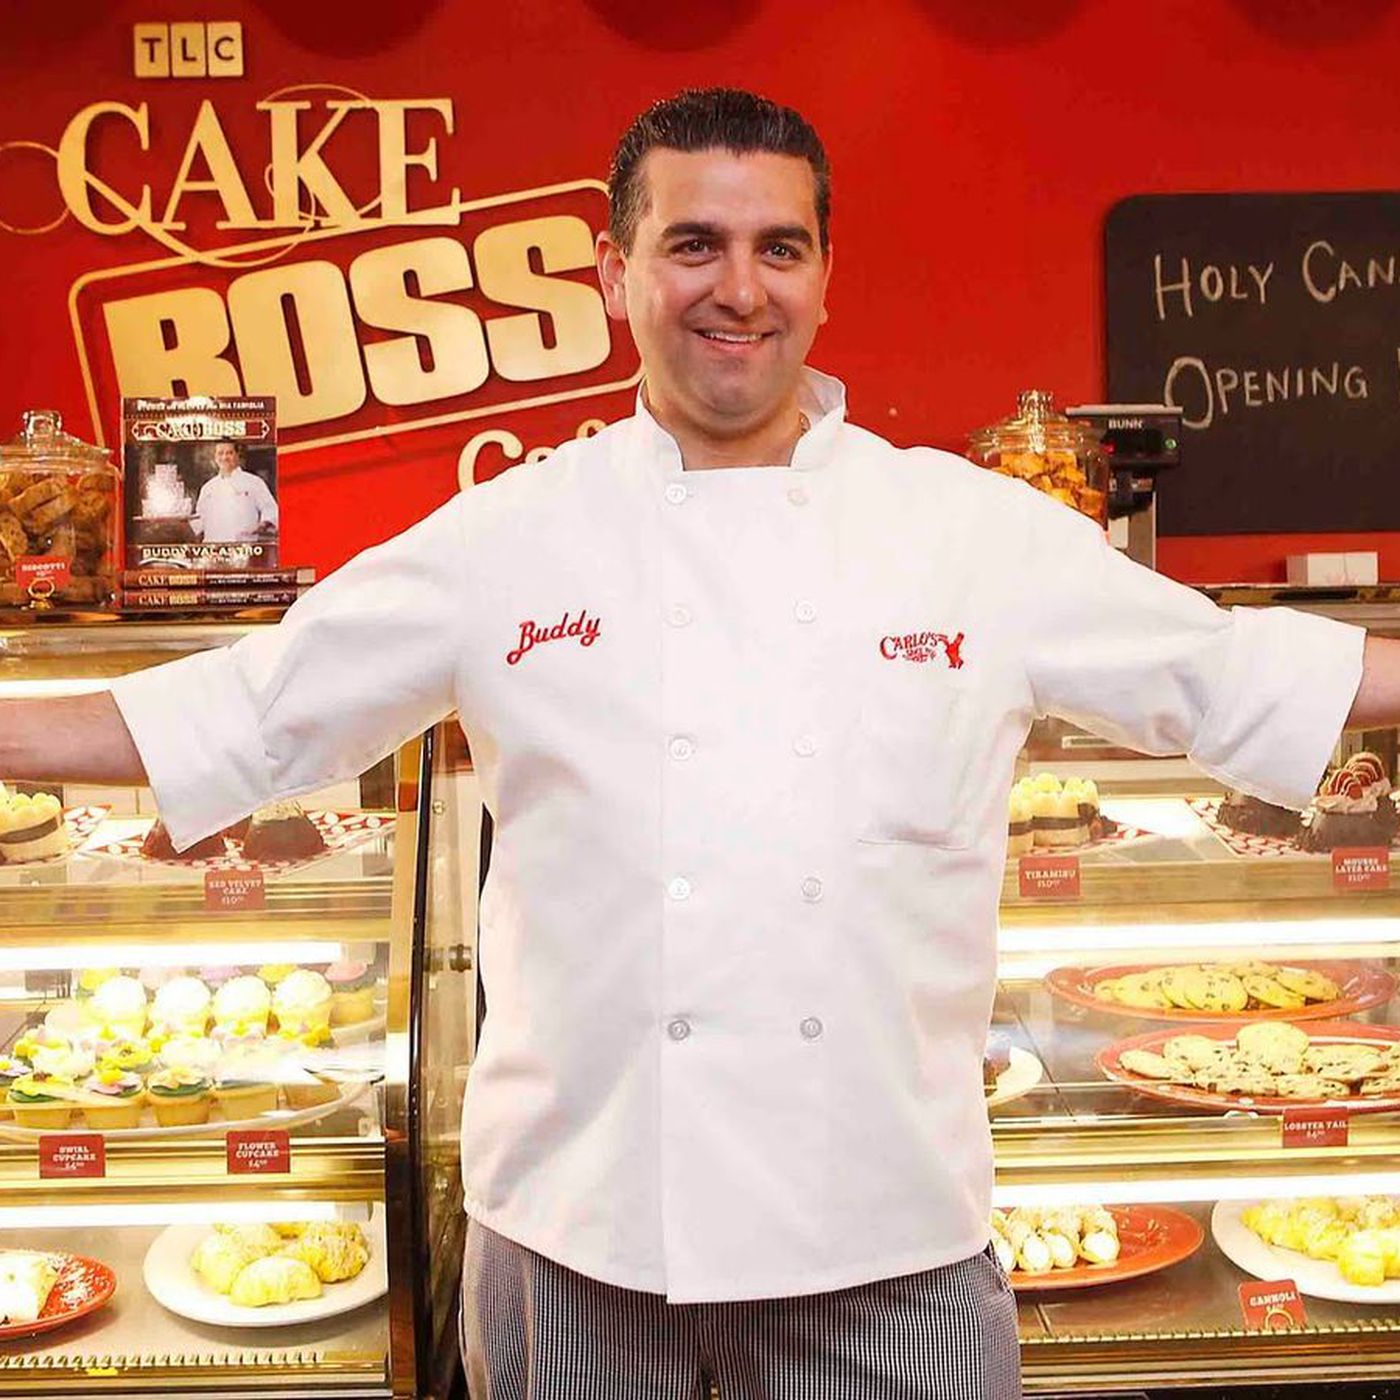